In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('btc_data.csv')
df.head()

,Date,priceUSD,transactions,size,sentbyaddress,difficulty,hashrate,mining_profitability,sentinusdUSD,transactionfeesUSD,...,price3rsiUSD,price7rsiUSD,price14rsiUSD,price30rsiUSD,price90rsiUSD,price3rocUSD,price7rocUSD,price14rocUSD,price30rocUSD,price90rocUSD
0,2010/07/17,0.0495,235,649.653,390,181.543,2.775561e+09,154298.0,1193.0,0.000010,...,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0
1,2010/07/18,0.0726,248,765.285,424,181.543,1.554461e+09,401834.0,2620.0,0.000243,...,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0
2,2010/07/19,0.0859,354,756.040,553,181.543,1.551287e+09,481473.0,4048.0,0.000022,...,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0
3,2010/07/20,0.0783,413,984.707,632,181.543,1.640430e+09,431831.0,2341.0,0.000000,...,82.751,0.0,0.0,0.0,0.0,58.099,0.0,0.0,0.0,0.0
4,2010/07/21,0.0767,256,542.483,440,181.543,1.723493e+09,460783.0,2122.0,0.000000,...,78.603,0.0,0.0,0.0,0.0,5.652,0.0,0.0,0.0,0.0


In [3]:
df_new=df.iloc[:,1:]

In [4]:
df_new.head(5)

,priceUSD,transactions,size,sentbyaddress,difficulty,hashrate,mining_profitability,sentinusdUSD,transactionfeesUSD,median_transaction_feeUSD,...,price3rsiUSD,price7rsiUSD,price14rsiUSD,price30rsiUSD,price90rsiUSD,price3rocUSD,price7rocUSD,price14rocUSD,price30rocUSD,price90rocUSD
0,0.0495,235,649.653,390,181.543,2.775561e+09,154298.0,1193.0,0.000010,0.0,...,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0
1,0.0726,248,765.285,424,181.543,1.554461e+09,401834.0,2620.0,0.000243,0.0,...,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0
2,0.0859,354,756.040,553,181.543,1.551287e+09,481473.0,4048.0,0.000022,0.0,...,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0
3,0.0783,413,984.707,632,181.543,1.640430e+09,431831.0,2341.0,0.000000,0.0,...,82.751,0.0,0.0,0.0,0.0,58.099,0.0,0.0,0.0,0.0
4,0.0767,256,542.483,440,181.543,1.723493e+09,460783.0,2122.0,0.000000,0.0,...,78.603,0.0,0.0,0.0,0.0,5.652,0.0,0.0,0.0,0.0


### Dropping the priceUSD column and storing it in 'y'

In [5]:
df1=df_new.reset_index(drop=True)
n=df1.drop('priceUSD',1)


C:\Users\KIIT\AppData\Local\Temp\ipykernel_13124\646315669.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  n=df1.drop('priceUSD',1)


In [6]:
y=df1[['priceUSD']]
y

,priceUSD
0,0.0495
1,0.0726
2,0.0859
3,0.0783
4,0.0767
...,...
3483,9349.0000
3484,9394.0000
3485,9366.0000
3486,9393.0000


### Reading the MINMAX PCA dataset

In [7]:
minmaxPCA=pd.read_csv('PCA_MinMaxScaler_data1.csv')
#Adding the y column to this dataset
combined_data=minmaxPCA.assign(priceUSD=y)
combined_data.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,29,30,31,32,33,34,35,36,37,priceUSD
0,0,-3.655104,0.802061,1.817268,-1.285273,-1.640494,1.700293,-1.001414,1.101779,-0.999867,...,0.153301,-0.027586,0.225252,0.007899,0.170539,0.097393,0.146309,0.208756,1.173401,0.0495
1,1,-3.614658,0.803416,1.686412,-1.009045,-1.609771,1.699671,-0.747059,1.416030,-0.615753,...,0.261052,-0.121278,0.115798,0.108756,0.043790,0.147877,0.246103,0.141600,1.104297,0.0726
2,2,-3.636358,0.825494,1.710698,-1.048296,-1.626373,1.841579,-0.698989,1.496502,-0.499075,...,0.356758,-0.111855,0.145736,-0.008782,0.276770,0.029030,0.211571,0.214689,0.931091,0.0859
3,3,-3.641610,0.745754,1.603314,-1.195112,-0.952689,1.644297,-0.151961,1.282045,-0.588409,...,0.360500,0.076649,0.157377,-0.213748,0.256696,0.187187,0.140654,0.291811,0.537814,0.0783
4,4,-3.646880,0.760457,1.639556,-1.193579,-1.102717,1.673044,-0.434564,1.083872,-0.812450,...,0.285444,0.095544,0.122837,-0.236417,0.286961,0.041868,0.133825,0.244540,0.446112,0.0767


### Dropping the first unnamed column

In [8]:
finaldata = combined_data.iloc[: , 1:]
finaldata

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,priceUSD
0,-3.655104,0.802061,1.817268,-1.285273,-1.640494,1.700293,-1.001414,1.101779,-0.999867,0.152710,...,0.153301,-0.027586,0.225252,0.007899,0.170539,0.097393,0.146309,0.208756,1.173401,0.0495
1,-3.614658,0.803416,1.686412,-1.009045,-1.609771,1.699671,-0.747059,1.416030,-0.615753,0.506121,...,0.261052,-0.121278,0.115798,0.108756,0.043790,0.147877,0.246103,0.141600,1.104297,0.0726
2,-3.636358,0.825494,1.710698,-1.048296,-1.626373,1.841579,-0.698989,1.496502,-0.499075,0.612378,...,0.356758,-0.111855,0.145736,-0.008782,0.276770,0.029030,0.211571,0.214689,0.931091,0.0859
3,-3.641610,0.745754,1.603314,-1.195112,-0.952689,1.644297,-0.151961,1.282045,-0.588409,0.833923,...,0.360500,0.076649,0.157377,-0.213748,0.256696,0.187187,0.140654,0.291811,0.537814,0.0783
4,-3.646880,0.760457,1.639556,-1.193579,-1.102717,1.673044,-0.434564,1.083872,-0.812450,0.726314,...,0.285444,0.095544,0.122837,-0.236417,0.286961,0.041868,0.133825,0.244540,0.446112,0.0767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3483,4.827080,3.872729,-0.564335,-0.964944,0.955012,-0.208703,-0.160729,0.079293,-0.353848,0.195394,...,0.004526,0.315107,-0.007492,0.132500,0.265255,0.171378,-0.052400,0.188256,0.122504,9349.0000
3484,4.874243,4.078286,-0.498325,-1.028046,0.857928,-0.213927,-0.295887,0.083715,-0.351354,0.203269,...,-0.087225,0.475346,-0.080046,-0.166548,0.307902,0.089965,0.003772,0.139277,0.202801,9394.0000
3485,4.873536,3.950721,-0.594500,-0.959722,1.011089,-0.306760,-0.063507,0.463026,-0.061280,0.456087,...,-0.133529,0.307913,-0.229377,0.031294,0.255388,-0.049842,0.003653,0.269696,0.125988,9366.0000
3486,4.822283,4.116169,-0.434845,-0.844725,0.491708,-0.136111,-0.857335,0.091674,-0.184611,0.583483,...,-0.138564,0.315845,-0.106430,0.072532,0.355768,0.043088,-0.011649,0.177111,0.143189,9393.0000


In [9]:
X = finaldata.iloc[:, :-1].values
y = finaldata.iloc[:, -1].values


### Splitting the dataset into the Training set and Test set

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


### Training the Linear Regression model on the Training set

In [11]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [12]:
y_pred = regressor.predict(X_test)

### Accuracy on linear regression

In [13]:
train_score = regressor.score(X_train, y_train)
print(f'Train score of trained model: {train_score*100}')

test_score = regressor.score(X_test, y_test)
print(f'Test score of trained model: {test_score*100}')

Train score of trained model: 99.11862649440762
Test score of trained model: 99.13277109132441


In [14]:
import sklearn.metrics as metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt

k = X_test.shape[1]
n = len(X_test)

MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
MAE = mean_absolute_error(y_test, y_pred)
MAPE = np.mean(np.abs( (y_test-y_pred) / y_test))*100
r2 = r2_score(y_test, y_pred)
adj_r2 = 1-(1-r2) * (n-1)/(n-k-1)

In [15]:
results = [MSE, RMSE, MAE, MAPE, r2, adj_r2]
metrics = ['MSE', 'RMSE', 'MAE', 'MAPE', 'r2', 'adj_r2']

table_results = pd.DataFrame({'Metric': metrics, 'Score': results})
table_results

,Metric,Score
0,MSE,124687.983001
1,RMSE,353.111856
2,MAE,235.832665
3,MAPE,7143.543201
4,r2,0.991328
5,adj_r2,0.990828


### Ridge Regression

In [16]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha = 0.001, normalize=True)
ridge.fit(X_train, y_train)

pred = ridge.predict(X_test)

train_score = ridge.score(X_train, y_train)
print(f'Train score of trained model: {train_score*100}')

test_score = ridge.score(X_test, y_test)
print(f'Test score of trained model: {test_score*100}')

Train score of trained model: 99.11852421018217
Test score of trained model: 99.12919741651307


C:\Users\KIIT\anaconda3\envs\test\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(


In [17]:
k = X_test.shape[1]
n = len(X_test)

MSE = mean_squared_error(y_test, pred)
RMSE = np.sqrt(mean_squared_error(y_test, pred))
MAE = mean_absolute_error(y_test, pred)
r2 = r2_score(y_test, pred)
adj_r2 = 1-(1-r2) * (n-1)/(n-k-1)

results = [MSE, RMSE, MAE, r2, adj_r2]
metrics = ['MSE', 'RMSE', 'MAE', 'r2', 'adj_r2']

table_results = pd.DataFrame({'Metric': metrics, 'Score': results})
table_results

,Metric,Score
0,MSE,125201.796943
1,RMSE,353.838659
2,MAE,236.130506
3,r2,0.991292
4,adj_r2,0.990790


### Lasso Regression

In [18]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha = 0.001, normalize=True)
lasso.fit(X_train, y_train)

pred = lasso.predict(X_test)

train_score = lasso.score(X_train, y_train)
print(f'Train score of trained model: {train_score*100}')

test_score = lasso.score(X_test, y_test)
print(f'Test score of trained model: {test_score*100}')

Train score of trained model: 99.11862552425018
Test score of trained model: 99.13259069160067


C:\Users\KIIT\anaconda3\envs\test\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


In [19]:
k = X_test.shape[1]
n = len(X_test)

MSE = mean_squared_error(y_test, pred)
RMSE = np.sqrt(mean_squared_error(y_test, pred))
MAE = mean_absolute_error(y_test, pred)
r2 = r2_score(y_test, pred)
adj_r2 = 1-(1-r2) * (n-1)/(n-k-1)

results = [MSE, RMSE, MAE, r2, adj_r2]
metrics = ['MSE', 'RMSE', 'MAE', 'r2', 'adj_r2']

table_results = pd.DataFrame({'Metric': metrics, 'Score': results})
table_results

,Metric,Score
0,MSE,124713.920418
1,RMSE,353.148581
2,MAE,235.821336
3,r2,0.991326
4,adj_r2,0.990826


### Training the Kernel SVM model on the Training set

In [33]:
from sklearn import preprocessing
from sklearn import utils
lab_enc = preprocessing.LabelEncoder()
training_scores_encoded = lab_enc.fit_transform(y_train)
print(training_scores_encoded)
print(utils.multiclass.type_of_target(y_train))
print(utils.multiclass.type_of_target(y_train.astype('int')))
print(utils.multiclass.type_of_target(training_scores_encoded))

[1767 2058  985 ... 1049 2116 2661]
continuous
multiclass
multiclass


### Applying grid search to find best model and the best parameters

from sklearn.model_selection import GridSearchCV
parameters = [{'C': [0.25, 0.5, 0.75, 1], 'kernel': ['linear']},
              {'C': [0.25, 0.5, 0.75, 1], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

In [49]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}

In [50]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, k

[CV] END ......................C=10, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END ......................C=10, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END ......................C=10, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END ......................C=10, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ......................C=10, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ......................C=10, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ......................C=10, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ...................

ValueError: 
All the 240 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\KIIT\anaconda3\envs\test\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\KIIT\anaconda3\envs\test\lib\site-packages\sklearn\svm\_base.py", line 182, in fit
    y = self._validate_targets(y)
  File "C:\Users\KIIT\anaconda3\envs\test\lib\site-packages\sklearn\svm\_base.py", line 735, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\KIIT\anaconda3\envs\test\lib\site-packages\sklearn\utils\multiclass.py", line 200, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'


### Gradient boosting Model and its parameter

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor()
parameters = {'learning_rate': [0.01,0.02,0.03,0.04],
                  'subsample'    : [0.9, 0.5, 0.2, 0.1],
                  'n_estimators' : [100,500,1000, 1500],
                  'max_depth'    : [4,6,8,10]
                 }

In [21]:
grid_GBR = GridSearchCV(estimator=GBR, param_grid = parameters, cv = 2, n_jobs=-1)
grid_GBR.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.02, 0.03, 0.04],
                         'max_depth': [4, 6, 8, 10],
                         'n_estimators': [100, 500, 1000, 1500],
                         'subsample': [0.9, 0.5, 0.2, 0.1]})

In [22]:
pred=grid_GBR.predict(X_test)
train_score = grid_GBR.score(X_train, y_train)
print(f'Train score of trained model: {train_score*100}')

test_score = grid_GBR.score(X_test, y_test)
print(f'Test score of trained model: {test_score*100}')

Train score of trained model: 99.97503506172866
Test score of trained model: 99.5896063640935


In [23]:
k = X_test.shape[1]
n = len(X_test)

MSE = mean_squared_error(y_test, pred)
RMSE = np.sqrt(mean_squared_error(y_test, pred))
MAE = mean_absolute_error(y_test, pred)
r2 = r2_score(y_test, pred)
adj_r2 = 1-(1-r2) * (n-1)/(n-k-1)

results = [MSE, RMSE, MAE, r2, adj_r2]
metrics = ['MSE', 'RMSE', 'MAE', 'r2', 'adj_r2']

table_results = pd.DataFrame({'Metric': metrics, 'Score': results})
table_results

,Metric,Score
0,MSE,59005.360852
1,RMSE,242.910191
2,MAE,128.741309
3,r2,0.995896
4,adj_r2,0.995659


In [24]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_GBR.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_GBR.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_GBR.best_params_)


 Results from Grid Search 

 The best estimator across ALL searched params:
 GradientBoostingRegressor(learning_rate=0.03, max_depth=4, n_estimators=1500,
                          subsample=0.2)

 The best score across ALL searched params:
 0.9920817418549985

 The best parameters across ALL searched params:
 {'learning_rate': 0.03, 'max_depth': 4, 'n_estimators': 1500, 'subsample': 0.2}


### Training the Random forest regression model on the whole dataset

In [25]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X, y)

RandomForestRegressor(n_estimators=10, random_state=0)

### Randomforest regressor using GridSearchCV 

In [26]:
from sklearn.metrics import r2_score
def Grid_Search_CV_RFR(X_train, y_train):
    from sklearn.model_selection import GridSearchCV
    from sklearn.model_selection import ShuffleSplit
    from sklearn.ensemble import RandomForestRegressor
    

    estimator = RandomForestRegressor()
    param_grid = { 
            "n_estimators"      : [10,20,30],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False],
            }

    grid = GridSearchCV(estimator, param_grid, n_jobs=-1, cv=5)

    grid.fit(X_train, y_train)

    return grid.best_score_ , grid.best_params_

def RFR(X_train, X_test, y_train, y_test, best_params):
    from sklearn.ensemble import RandomForestRegressor
    estimator = RandomForestRegressor(n_jobs=-1).set_params(**best_params)
    estimator.fit(X_train,y_train)
    y_predict = estimator.predict(X_test)
    print ("R2 score:",r2_score(y_test,y_predict))
    k = X_test.shape[1]
    n = len(X_test)

    MSE = mean_squared_error(y_test, y_predict)
    RMSE = np.sqrt(mean_squared_error(y_test, y_predict))
    MAE = mean_absolute_error(y_test, y_predict)
    r2 = r2_score(y_test, y_predict)
    adj_r2 = 1-(1-r2) * (n-1)/(n-k-1)

    results = [MSE, RMSE, MAE, r2, adj_r2]
    metrics = ['MSE', 'RMSE', 'MAE', 'r2', 'adj_r2']

    table_results = pd.DataFrame({'Metric': metrics, 'Score': results})
    print(table_results)
    return y_test,y_predict

In [27]:
for i in range(5):
    print ("Loop: " , i)
    print ("--------------")
    best_score, best_params = Grid_Search_CV_RFR(X_train, y_train)
    y_test , y_predict = RFR(X_train, X_test, y_train, y_test, best_params)
    print ("Best Score:" ,best_score)
    print ("Best params:",best_params)

Loop:  0
--------------


C:\Users\KIIT\anaconda3\envs\test\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\KIIT\anaconda3\envs\test\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


R2 score: 0.9944382674939244
   Metric         Score
0     MSE  79965.185805
1    RMSE    282.781162
2     MAE    125.564509
3      r2      0.994438
4  adj_r2      0.994118
Best Score: 0.9923497819830086
Best params: {'bootstrap': True, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 30}
Loop:  1
--------------


C:\Users\KIIT\anaconda3\envs\test\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\KIIT\anaconda3\envs\test\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


R2 score: 0.9933283736577053
   Metric         Score
0     MSE  95922.959168
1    RMSE    309.714319
2     MAE    128.824730
3      r2      0.993328
4  adj_r2      0.992944
Best Score: 0.9925063032407749
Best params: {'bootstrap': True, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 30}
Loop:  2
--------------


C:\Users\KIIT\anaconda3\envs\test\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\KIIT\anaconda3\envs\test\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


R2 score: 0.9941210777043806
   Metric         Score
0     MSE  84525.660518
1    RMSE    290.732971
2     MAE    124.407251
3      r2      0.994121
4  adj_r2      0.993782
Best Score: 0.992878882981237
Best params: {'bootstrap': True, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 30}
Loop:  3
--------------


C:\Users\KIIT\anaconda3\envs\test\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\KIIT\anaconda3\envs\test\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


R2 score: 0.9940079154768195
   Metric         Score
0     MSE  86152.678456
1    RMSE    293.517765
2     MAE    125.944895
3      r2      0.994008
4  adj_r2      0.993662
Best Score: 0.9924286158465021
Best params: {'bootstrap': True, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 20}
Loop:  4
--------------


C:\Users\KIIT\anaconda3\envs\test\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\KIIT\anaconda3\envs\test\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


R2 score: 0.9936233577306293
   Metric         Score
0     MSE  91681.752642
1    RMSE    302.789948
2     MAE    129.808009
3      r2      0.993623
4  adj_r2      0.993256
Best Score: 0.9924795405062243
Best params: {'bootstrap': True, 'max_features': 'auto', 'min_samples_split': 4, 'n_estimators': 30}


from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=100, batch_size=256, verbose=2)

### Building the model

In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU
from tensorflow.keras.layers import Dropout

In [12]:
classifier = Sequential()
classifier.add(Dense(units=735,kernel_initializer='he_normal',activation='relu'))
Dropout(0.2)
classifier.add(Dense(units=32,kernel_initializer='normal',activation='relu',kernel_regularizer = 'l1'))
Dropout(0.2)
classifier.add(Dense(units=8,kernel_initializer='normal',activation='relu'))
classifier.add(Dense(units=8,kernel_initializer='normal',activation='relu'))
#Adding the output layer
classifier.add(Dense(1,kernel_initializer='normal',activation='linear'))

In [13]:
classifier.compile(optimizer='adam',loss='mean_absolute_error',metrics=['mean_absolute_error'])

In [14]:
model_history=classifier.fit(X_train,y_train,validation_split=0.2,batch_size=16,epochs=100)

Epoch 1/100
140/140 [==============================] - 1s 5ms/step - loss: 2116.8113 - mean_absolute_error: 2113.4070 - val_loss: 2169.3162 - val_mean_absolute_error: 2160.4958
Epoch 2/100
140/140 [==============================] - 0s 3ms/step - loss: 1057.4983 - mean_absolute_error: 1033.9836 - val_loss: 406.0324 - val_mean_absolute_error: 376.6014
Epoch 3/100
140/140 [==============================] - 0s 3ms/step - loss: 247.3941 - mean_absolute_error: 216.8650 - val_loss: 210.0865 - val_mean_absolute_error: 179.0924
Epoch 4/100
140/140 [==============================] - 0s 3ms/step - loss: 176.2959 - mean_absolute_error: 145.5588 - val_loss: 182.5172 - val_mean_absolute_error: 152.0863
Epoch 5/100
140/140 [==============================] - 0s 3ms/step - loss: 154.5115 - mean_absolute_error: 123.9923 - val_loss: 160.9641 - val_mean_absolute_error: 130.4518
Epoch 6/100
140/140 [==============================] - 0s 3ms/step - loss: 139.9216 - mean_absolute_error: 109.4904 - val_loss: 1

Epoch 49/100
140/140 [==============================] - 0s 3ms/step - loss: 66.5729 - mean_absolute_error: 43.3348 - val_loss: 75.2412 - val_mean_absolute_error: 52.0372
Epoch 50/100
140/140 [==============================] - 0s 3ms/step - loss: 63.3829 - mean_absolute_error: 40.1896 - val_loss: 73.5875 - val_mean_absolute_error: 50.4605
Epoch 51/100
140/140 [==============================] - 0s 3ms/step - loss: 64.3946 - mean_absolute_error: 41.3675 - val_loss: 71.2614 - val_mean_absolute_error: 48.2969
Epoch 52/100
140/140 [==============================] - 0s 3ms/step - loss: 61.7172 - mean_absolute_error: 38.8613 - val_loss: 74.8366 - val_mean_absolute_error: 52.0432
Epoch 53/100
140/140 [==============================] - 0s 3ms/step - loss: 62.7763 - mean_absolute_error: 40.0708 - val_loss: 98.7459 - val_mean_absolute_error: 75.9218
Epoch 54/100
140/140 [==============================] - 0s 2ms/step - loss: 61.6144 - mean_absolute_error: 39.0391 - val_loss: 81.5255 - val_mean_abso

In [15]:
train_mse = classifier.evaluate(X_train, y_train, verbose=0)
test_mse = classifier.evaluate(X_test, y_test, verbose=0)

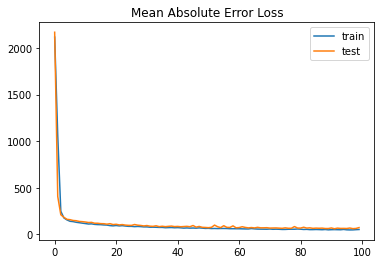

In [16]:
import matplotlib.pyplot as plt
plt.title('Mean Absolute Error Loss')
plt.plot(model_history.history['loss'], label='train')
plt.plot(model_history.history['val_loss'], label='test')
plt.legend()
plt.show()

### Model 2

In [12]:
classifier = Sequential()
classifier.add(Dense(units=735,kernel_initializer='he_normal',activation='relu'))
Dropout(0.2)
classifier.add(Dense(units=32,kernel_initializer='normal',activation='relu',kernel_regularizer = 'l1'))
Dropout(0.2)
classifier.add(Dense(units=8,kernel_initializer='normal',activation='relu',kernel_regularizer = 'l1'))
classifier.add(Dense(units=8,kernel_initializer='normal',activation='relu',kernel_regularizer = 'l1'))
#Adding the output layer
classifier.add(Dense(1,kernel_initializer='normal',activation='linear'))

In [13]:
classifier.compile(optimizer='adam',loss='mean_absolute_error',metrics=['mean_absolute_error'])

In [14]:
model_history=classifier.fit(X_train,y_train,validation_split=0.2,batch_size=16,epochs=100)

Epoch 1/100
140/140 [==============================] - 1s 4ms/step - loss: 2126.3418 - mean_absolute_error: 2124.0940 - val_loss: 2289.1755 - val_mean_absolute_error: 2289.0464
Epoch 2/100
140/140 [==============================] - 0s 3ms/step - loss: 1781.9093 - mean_absolute_error: 1774.3776 - val_loss: 974.8943 - val_mean_absolute_error: 954.6214
Epoch 3/100
140/140 [==============================] - 0s 3ms/step - loss: 465.4309 - mean_absolute_error: 443.7422 - val_loss: 251.6695 - val_mean_absolute_error: 228.6064
Epoch 4/100
140/140 [==============================] - 0s 3ms/step - loss: 189.9714 - mean_absolute_error: 166.6949 - val_loss: 175.1933 - val_mean_absolute_error: 151.7553
Epoch 5/100
140/140 [==============================] - 0s 3ms/step - loss: 150.2961 - mean_absolute_error: 126.8401 - val_loss: 162.5774 - val_mean_absolute_error: 139.0245
Epoch 6/100
140/140 [==============================] - 0s 3ms/step - loss: 136.3303 - mean_absolute_error: 112.8588 - val_loss: 1

Epoch 49/100
140/140 [==============================] - 0s 3ms/step - loss: 61.3619 - mean_absolute_error: 40.8996 - val_loss: 74.2761 - val_mean_absolute_error: 53.8581
Epoch 50/100
140/140 [==============================] - 0s 2ms/step - loss: 61.1455 - mean_absolute_error: 40.7498 - val_loss: 71.7102 - val_mean_absolute_error: 51.3523
Epoch 51/100
140/140 [==============================] - 0s 3ms/step - loss: 61.4987 - mean_absolute_error: 41.1866 - val_loss: 75.5767 - val_mean_absolute_error: 55.3261
Epoch 52/100
140/140 [==============================] - 0s 3ms/step - loss: 59.8671 - mean_absolute_error: 39.6767 - val_loss: 71.1318 - val_mean_absolute_error: 50.9874
Epoch 53/100
140/140 [==============================] - 0s 2ms/step - loss: 59.1707 - mean_absolute_error: 39.0660 - val_loss: 70.8244 - val_mean_absolute_error: 50.7948
Epoch 54/100
140/140 [==============================] - 0s 3ms/step - loss: 58.7544 - mean_absolute_error: 38.7665 - val_loss: 71.8060 - val_mean_abso

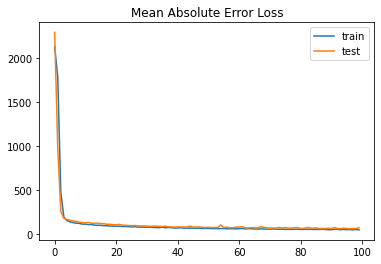

In [15]:
import matplotlib.pyplot as plt
plt.title('Mean Absolute Error Loss')
plt.plot(model_history.history['loss'], label='train')
plt.plot(model_history.history['val_loss'], label='test')
plt.legend()
plt.show()

### Model 3

In [16]:
#mean_squared_logarithmic_error
classifier = Sequential()
classifier.add(Dense(units=735,kernel_initializer='he_normal',activation='relu'))
Dropout(0.2)
classifier.add(Dense(units=32,kernel_initializer='normal',activation='relu',kernel_regularizer = 'l1'))
Dropout(0.2)
classifier.add(Dense(units=8,kernel_initializer='normal',activation='relu',kernel_regularizer = 'l1'))
classifier.add(Dense(units=8,kernel_initializer='normal',activation='relu',kernel_regularizer = 'l1'))
#Adding the output layer
classifier.add(Dense(1,kernel_initializer='normal',activation='linear'))

In [17]:
classifier.compile(optimizer='adam',loss='mean_squared_logarithmic_error',metrics=['mse'])

In [18]:
history=classifier.fit(X_train,y_train,validation_split=0.2,batch_size=16,epochs=100)

Epoch 1/100
140/140 [==============================] - 1s 4ms/step - loss: 30.3770 - mse: 15813155.0000 - val_loss: 14.5718 - val_mse: 17271544.0000
Epoch 2/100
140/140 [==============================] - 0s 3ms/step - loss: 10.4196 - mse: 15246698.0000 - val_loss: 8.0159 - val_mse: 16498613.0000
Epoch 3/100
140/140 [==============================] - 0s 3ms/step - loss: 6.5377 - mse: 14503308.0000 - val_loss: 5.6767 - val_mse: 15612922.0000
Epoch 4/100
140/140 [==============================] - 0s 3ms/step - loss: 4.8606 - mse: 13648374.0000 - val_loss: 4.4041 - val_mse: 14668909.0000
Epoch 5/100
140/140 [==============================] - 0s 3ms/step - loss: 3.8606 - mse: 12748597.0000 - val_loss: 3.5786 - val_mse: 13652786.0000
Epoch 6/100
140/140 [==============================] - 0s 3ms/step - loss: 3.0339 - mse: 11498319.0000 - val_loss: 2.6703 - val_mse: 11958275.0000
Epoch 7/100
140/140 [==============================] - 0s 3ms/step - loss: 2.3305 - mse: 9873509.0000 - val_loss: 2

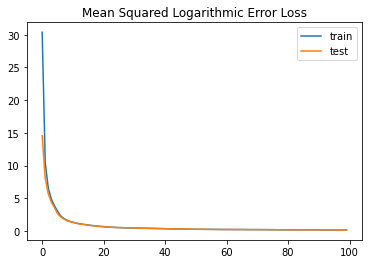

In [19]:
# plot loss during training
plt.title('Mean Squared Logarithmic Error Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

### Model 4

In [20]:
# define model for MSE Loss
#mean_squared_error
classifier = Sequential()
classifier.add(Dense(units=735,kernel_initializer='he_normal',activation='relu'))
Dropout(0.2)
classifier.add(Dense(units=32,kernel_initializer='normal',activation='relu',kernel_regularizer = 'l1'))
Dropout(0.2)
classifier.add(Dense(units=8,kernel_initializer='normal',activation='relu',kernel_regularizer = 'l1'))
classifier.add(Dense(units=8,kernel_initializer='normal',activation='relu',kernel_regularizer = 'l1'))
#Adding the output layer
classifier.add(Dense(1,kernel_initializer='normal',activation='linear'))

In [21]:
classifier.compile(optimizer='adam',loss='mean_squared_error',metrics=['mse'])

In [22]:
history=classifier.fit(X_train,y_train,validation_split=0.2,batch_size=10,epochs=100)

Epoch 1/100
224/224 [==============================] - 1s 4ms/step - loss: 11483884.0000 - mse: 11483854.0000 - val_loss: 1240167.6250 - val_mse: 1240126.3750
Epoch 2/100
224/224 [==============================] - 1s 2ms/step - loss: 434550.1875 - mse: 434508.0938 - val_loss: 195774.0469 - val_mse: 195730.8906
Epoch 3/100
224/224 [==============================] - 1s 2ms/step - loss: 112932.8125 - mse: 112889.0000 - val_loss: 107873.6250 - val_mse: 107829.4531
Epoch 4/100
224/224 [==============================] - 1s 2ms/step - loss: 75601.5469 - mse: 75557.0703 - val_loss: 85242.3828 - val_mse: 85197.6953
Epoch 5/100
224/224 [==============================] - 1s 3ms/step - loss: 59867.7305 - mse: 59822.7656 - val_loss: 73004.3516 - val_mse: 72959.0000
Epoch 6/100
224/224 [==============================] - 1s 3ms/step - loss: 53676.1836 - mse: 53630.4258 - val_loss: 61716.5820 - val_mse: 61670.4531
Epoch 7/100
224/224 [==============================] - 1s 3ms/step - loss: 45433.2617 - 

Epoch 56/100
224/224 [==============================] - 1s 2ms/step - loss: 5745.4849 - mse: 5687.2852 - val_loss: 9395.0361 - val_mse: 9336.7900
Epoch 57/100
224/224 [==============================] - 0s 2ms/step - loss: 4254.8848 - mse: 4196.6318 - val_loss: 9975.4062 - val_mse: 9917.0439
Epoch 58/100
224/224 [==============================] - 0s 2ms/step - loss: 4980.3218 - mse: 4921.9604 - val_loss: 14341.3896 - val_mse: 14283.0547
Epoch 59/100
224/224 [==============================] - 0s 2ms/step - loss: 5140.8618 - mse: 5082.4380 - val_loss: 12294.5449 - val_mse: 12236.0645
Epoch 60/100
224/224 [==============================] - 0s 2ms/step - loss: 6719.1494 - mse: 6660.6938 - val_loss: 8205.2598 - val_mse: 8146.7437
Epoch 61/100
224/224 [==============================] - 0s 2ms/step - loss: 4768.2930 - mse: 4709.7280 - val_loss: 9385.7002 - val_mse: 9327.1768
Epoch 62/100
224/224 [==============================] - 0s 2ms/step - loss: 4205.6172 - mse: 4146.9761 - val_loss: 8392.

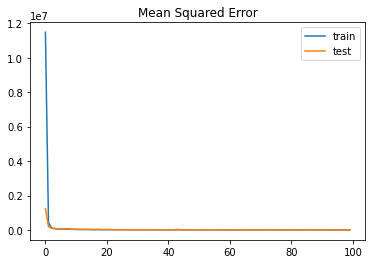

In [23]:
# plot loss during training
plt.title('Mean Squared Error')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()